# 필요 모듈 로딩

In [1]:
# 필요 모듈을 로딩합니다.

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

# 챌린져 데이터 셋 로딩

In [2]:
# 챌린처 랭크 게임데이터 셋을 불러옵니다.
lol_chl = pd.read_csv("C:/Users/wkdgu/파이썬을 활용한 데이터 분석-학교수업/팀플/Challenger_Ranked_Games.csv")
lol_chl

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455


# 이상치 및 gameId 칼럼 제거 함수화

In [3]:
def lol_del_outlier(lol_data):
    
    # gameId 칼럼을 제거해 줍니다.
    lol_data = lol_data.drop("gameId", axis=1)
    
    # 블루팀총합 레벨이 40이하인 게임은 제거해서 lol_chl에 담아줍니다.
    lol_data = lol_data[lol_data["blueTotalLevel"] > 40]
    
    # 레드팀총합 레벨이 40이하인 게임은 제거해서 lol_chl에 담아줍니다.
    lol_data = lol_data[lol_data["redTotalLevel"] > 40]

    # 블루팀이 와드를 설치한 개수가 10개 미만인 게임을 제거해줍니다.
    lol_data = lol_data[lol_data['blueWardPlaced'] > 10]

    # 레드팀이 와드를 설치한 개수가 10개 미만인 게임을 제거해줍니다.
    lol_data = lol_data[lol_data['redWardPlaced'] > 10]
    
    # 경기시간이 15분 미만인 데이터는 삭제합니다.
    lol_data = lol_data[round(lol_data['gameDuraton']/60) >= 15]

    return lol_data

In [4]:
lol_chl = lol_del_outlier(lol_chl)
lol_chl

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1280,1,0,1,1,1,1,3,1,7,...,28,45732,37657,490,57,11.4,89,4,17334,16396
26899,1468,0,1,0,0,0,0,1,0,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,970,0,1,1,0,1,0,3,0,5,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,1480,0,1,1,0,1,0,1,0,4,...,34,55214,48849,636,66,13.2,175,6,25448,27675


# game_time 칼럼 추가

In [5]:
# game_time 칼럼 추가
lol_chl['game_time'] = lol_chl['gameDuraton']/60
lol_chl

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,game_time
0,1323,0,1,0,0,0,0,0,0,0,...,73016,49832,533,64,12.8,138,8,38711,60463,22.050000
1,1317,1,0,0,0,1,0,2,0,4,...,44218,37136,571,59,11.8,134,3,24829,14105,21.950000
2,932,0,0,0,0,0,0,0,0,0,...,30797,35364,400,50,10.0,89,5,12589,45201,15.533333
3,2098,0,0,0,1,1,0,1,1,2,...,125866,70528,832,84,16.8,205,9,65312,88202,34.966667
4,2344,1,1,1,1,1,1,2,2,11,...,131536,74596,794,85,17.0,227,7,86431,64141,39.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1280,1,0,1,1,1,1,3,1,7,...,45732,37657,490,57,11.4,89,4,17334,16396,21.333333
26899,1468,0,1,0,0,0,0,1,0,0,...,75531,46558,478,64,12.8,141,6,48596,42733,24.466667
26900,970,0,1,1,0,1,0,3,0,5,...,99837,70177,455,72,14.4,136,11,15817,50217,16.166667
26901,1480,0,1,1,0,1,0,1,0,4,...,55214,48849,636,66,13.2,175,6,25448,27675,24.666667


# 게임 시간을 20분 이하, 30분 이하, 40분 이하, 40분 이상으로 나눕니다.

In [6]:
# 게임 시간을 20분 이하, 30분 이하, 40분 이하, 40분 이상으로 나눕니다.
game_part1 = lol_chl[lol_chl['game_time']<20]
game_part2 = lol_chl[(lol_chl['game_time']>=20) & (lol_chl['game_time']<30)]
game_part3 = lol_chl[(lol_chl['game_time']>=30) & (lol_chl['game_time']<40)]
game_part4 = lol_chl[lol_chl['game_time']>=40]

In [7]:
print("총 게임 판수 :", lol_chl.shape[0])
print("20분 미만 :", game_part1.shape[0], ', 20분 미만 게임의 비율 :',  round(game_part1.shape[0] / lol_chl.shape[0], 2))
print("20~30분 :", game_part2.shape[0], ', 20~30분 게임의 비율 :',  round(game_part2.shape[0] / lol_chl.shape[0], 2))
print("30~40분 :", game_part3.shape[0], ', 30~40분 게임의 비율 :',  round(game_part3.shape[0] / lol_chl.shape[0], 2))
print("40분 이상 :", game_part4.shape[0], ', 40분 이상 게임의 비율 :',  round(game_part4.shape[0] / lol_chl.shape[0], 2))

총 게임 판수 : 23633
20분 미만 : 4938 , 20분 미만 게임의 비율 : 0.21
20~30분 : 13142 , 20~30분 게임의 비율 : 0.56
30~40분 : 5178 , 30~40분 게임의 비율 : 0.22
40분 이상 : 375 , 40분 이상 게임의 비율 : 0.02


# game_time_dummy 추가

In [8]:
# game_time_dummy 추가
lol_chl['game_time_dummy'] = 0

lol_chl['game_time_dummy'][lol_chl['game_time']<20] = "<20m"
lol_chl['game_time_dummy'][(lol_chl['game_time']>=20) & (lol_chl['game_time']<30)] = "20m ~ 30m"
lol_chl['game_time_dummy'][(lol_chl['game_time']>=30) & (lol_chl['game_time']<40)] = "30m ~ 40m"
lol_chl['game_time_dummy'][lol_chl['game_time']>=40] = '=>40m'
lol_chl

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,game_time,game_time_dummy
0,1323,0,1,0,0,0,0,0,0,0,...,49832,533,64,12.8,138,8,38711,60463,22.050000,20m ~ 30m
1,1317,1,0,0,0,1,0,2,0,4,...,37136,571,59,11.8,134,3,24829,14105,21.950000,20m ~ 30m
2,932,0,0,0,0,0,0,0,0,0,...,35364,400,50,10.0,89,5,12589,45201,15.533333,<20m
3,2098,0,0,0,1,1,0,1,1,2,...,70528,832,84,16.8,205,9,65312,88202,34.966667,30m ~ 40m
4,2344,1,1,1,1,1,1,2,2,11,...,74596,794,85,17.0,227,7,86431,64141,39.066667,30m ~ 40m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1280,1,0,1,1,1,1,3,1,7,...,37657,490,57,11.4,89,4,17334,16396,21.333333,20m ~ 30m
26899,1468,0,1,0,0,0,0,1,0,0,...,46558,478,64,12.8,141,6,48596,42733,24.466667,20m ~ 30m
26900,970,0,1,1,0,1,0,3,0,5,...,70177,455,72,14.4,136,11,15817,50217,16.166667,<20m
26901,1480,0,1,1,0,1,0,1,0,4,...,48849,636,66,13.2,175,6,25448,27675,24.666667,20m ~ 30m


# first변수가 승패에 끼치는 영향

## 시간대별로 퍼블이 승리에 끼치는 영향

<AxesSubplot:title={'center':'>40m'}, xlabel='blueFirstBlood', ylabel='blueWins'>

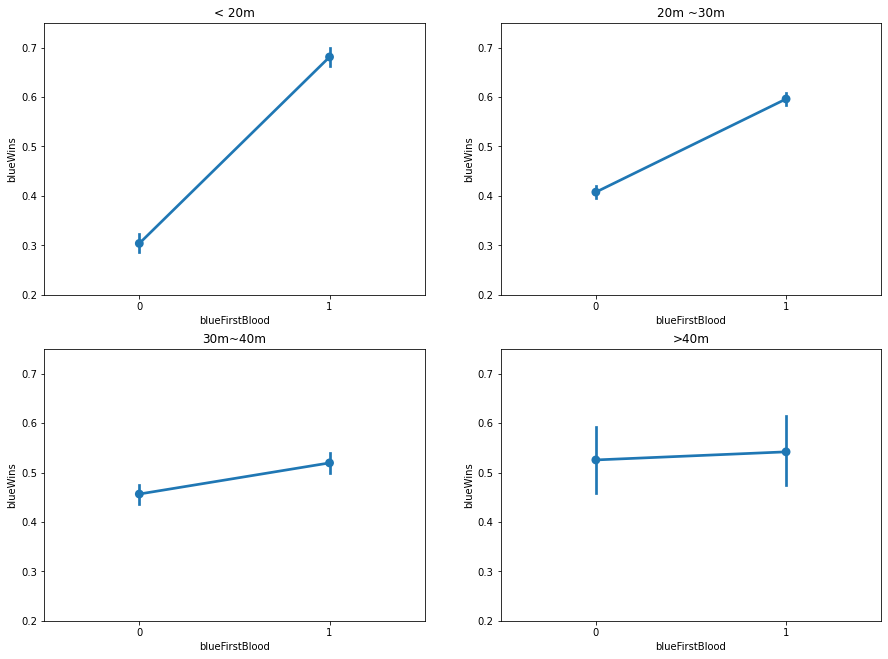

In [9]:
# 시간대별로 퍼블이 승리에 끼치는 영향
fig, axs = plt.subplots(2, 2, figsize=(15,11))

axs[0][0].set_title('< 20m')
axs[0][1].set_title('20m ~30m')
axs[1][0].set_title('30m~40m')
axs[1][1].set_title('>40m')

axs[0][0].set_ylim(0.2, 0.75)
axs[0][1].set_ylim(0.2, 0.75)
axs[1][0].set_ylim(0.2, 0.75)
axs[1][1].set_ylim(0.2, 0.75)

sns.pointplot(x='blueFirstBlood', y='blueWins', data=game_part1, ax = axs[0][0])
sns.pointplot(x='blueFirstBlood', y='blueWins', data=game_part2, ax = axs[0][1])
sns.pointplot(x='blueFirstBlood', y='blueWins', data=game_part3, ax = axs[1][0])
sns.pointplot(x='blueFirstBlood', y='blueWins', data=game_part4, ax = axs[1][1])

In [10]:
# crosstab :범주형 변수로 되어있는 요인별로 교차분석해서 행, 열 요인 기준 별로 빈도를 세는 교차표를 만들어줌

# crosstab의 파라미터
# index : values to group bu in the rows
# columns : values to group by in the columns
# rownames : assigning row names
# colnames : assigning column names

pd.crosstab(index = game_part3['blueWins'], columns = game_part3['blueFirstBlood'], margins=True)

blueFirstBlood,0,1,All
blueWins,,,
0,1407,1244,2651
1,1182,1345,2527
All,2589,2589,5178


In [11]:
print('퍼블을 딴 게임중에서 이긴 비율', 1345/2589)
print('퍼블을 못 딴 게임중에서 이긴 비율', 1182/2589)

퍼블을 딴 게임중에서 이긴 비율 0.5195056006179992
퍼블을 못 딴 게임중에서 이긴 비율 0.45654692931633833


## 시간대별로 첫 타워가 승리에 끼치는 영향

<AxesSubplot:title={'center':'>40m'}, xlabel='blueFirstTower', ylabel='blueWins'>

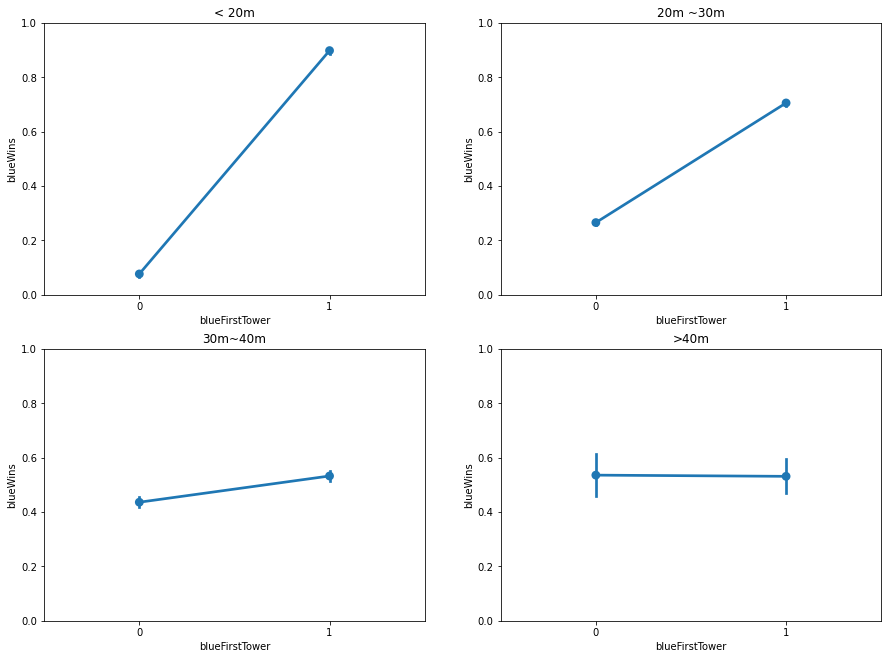

In [12]:
# 시간대별로 첫 타워가 승리에 끼치는 영향
fig, axs = plt.subplots(2, 2, figsize=(15,11))

axs[0][0].set_title('< 20m')
axs[0][1].set_title('20m ~30m')
axs[1][0].set_title('30m~40m')
axs[1][1].set_title('>40m')

axs[0][0].set_ylim(0, 1)
axs[0][1].set_ylim(0, 1)
axs[1][0].set_ylim(0, 1)
axs[1][1].set_ylim(0, 1)

sns.pointplot(x='blueFirstTower', y='blueWins', data=game_part1, ax = axs[0][0])
sns.pointplot(x='blueFirstTower', y='blueWins', data=game_part2, ax = axs[0][1])
sns.pointplot(x='blueFirstTower', y='blueWins', data=game_part3, ax = axs[1][0])
sns.pointplot(x='blueFirstTower', y='blueWins', data=game_part4, ax = axs[1][1])

## 시간대별로 첫 바론이 승리에 끼치는 영향

<AxesSubplot:title={'center':'>40m'}, xlabel='blueFirstBaron', ylabel='blueWins'>

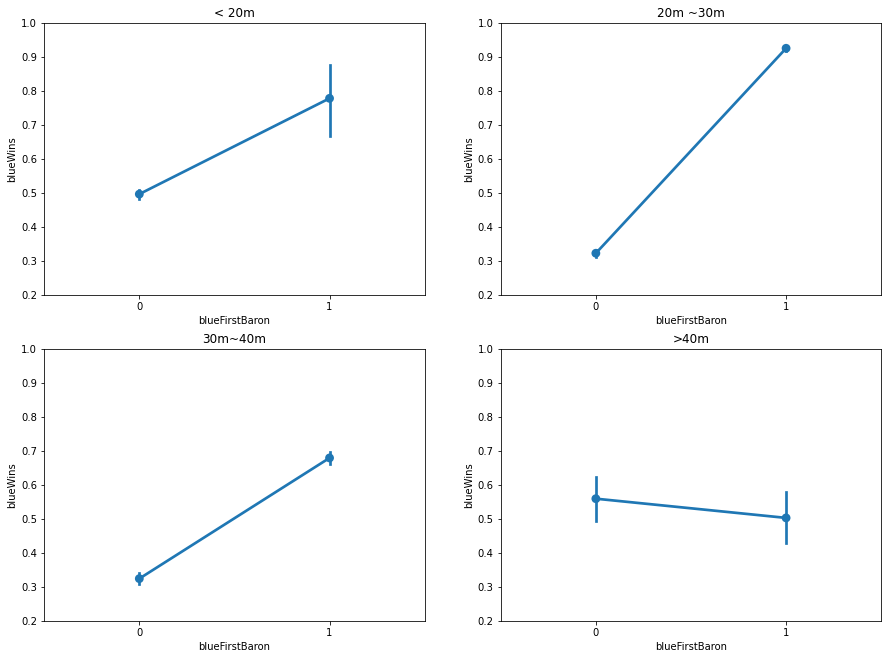

In [13]:
# 시간대별로 첫 바론이 승리에 끼치는 영향
fig, axs = plt.subplots(2, 2, figsize=(15,11))

axs[0][0].set_title('< 20m')
axs[0][1].set_title('20m ~30m')
axs[1][0].set_title('30m~40m')
axs[1][1].set_title('>40m')

axs[0][0].set_ylim(0.2, 1)
axs[0][1].set_ylim(0.2, 1)
axs[1][0].set_ylim(0.2, 1)
axs[1][1].set_ylim(0.2, 1)

sns.pointplot(x='blueFirstBaron', y='blueWins', data=game_part1, ax = axs[0][0])
sns.pointplot(x='blueFirstBaron', y='blueWins', data=game_part2, ax = axs[0][1])
sns.pointplot(x='blueFirstBaron', y='blueWins', data=game_part3, ax = axs[1][0])
sns.pointplot(x='blueFirstBaron', y='blueWins', data=game_part4, ax = axs[1][1])

## 시간대별로 첫 용이 승리에 끼치는 영향

<AxesSubplot:title={'center':'>40m'}, xlabel='blueFirstDragon', ylabel='blueWins'>

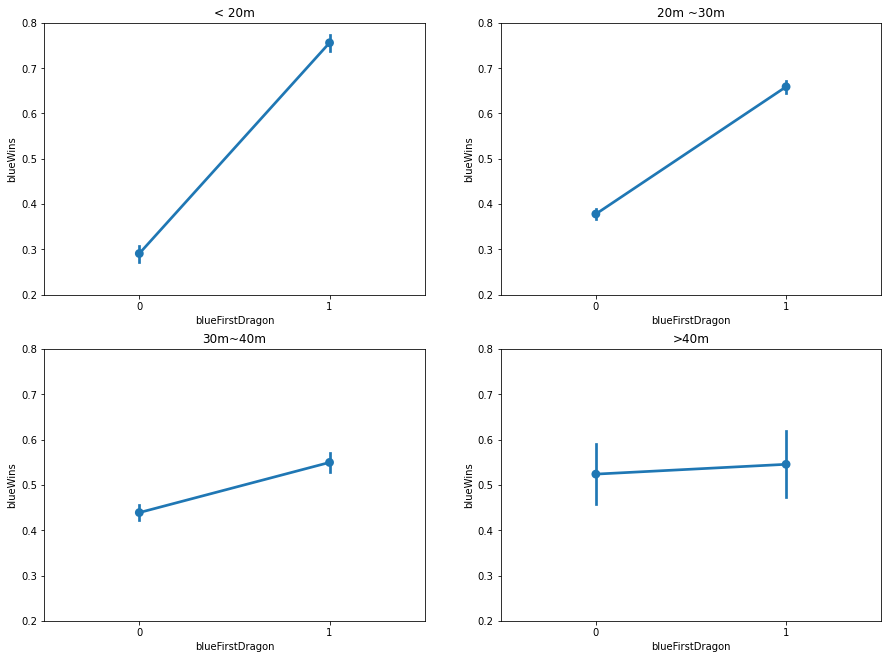

In [14]:
# 시간대별로 첫 용이 승리에 끼치는 영향
fig, axs = plt.subplots(2, 2, figsize=(15,11))

axs[0][0].set_title('< 20m')
axs[0][1].set_title('20m ~30m')
axs[1][0].set_title('30m~40m')
axs[1][1].set_title('>40m')

axs[0][0].set_ylim(0.2, 0.8)
axs[0][1].set_ylim(0.2, 0.8)
axs[1][0].set_ylim(0.2, 0.8)
axs[1][1].set_ylim(0.2, 0.8)

sns.pointplot(x='blueFirstDragon', y='blueWins', data=game_part1, ax = axs[0][0])
sns.pointplot(x='blueFirstDragon', y='blueWins', data=game_part2, ax = axs[0][1])
sns.pointplot(x='blueFirstDragon', y='blueWins', data=game_part3, ax = axs[1][0])
sns.pointplot(x='blueFirstDragon', y='blueWins', data=game_part4, ax = axs[1][1])

## 시간대별로 첫 억제기가 승리에 끼치는 영향

<AxesSubplot:title={'center':'>40m'}, xlabel='blueFirstInhibitor', ylabel='blueWins'>

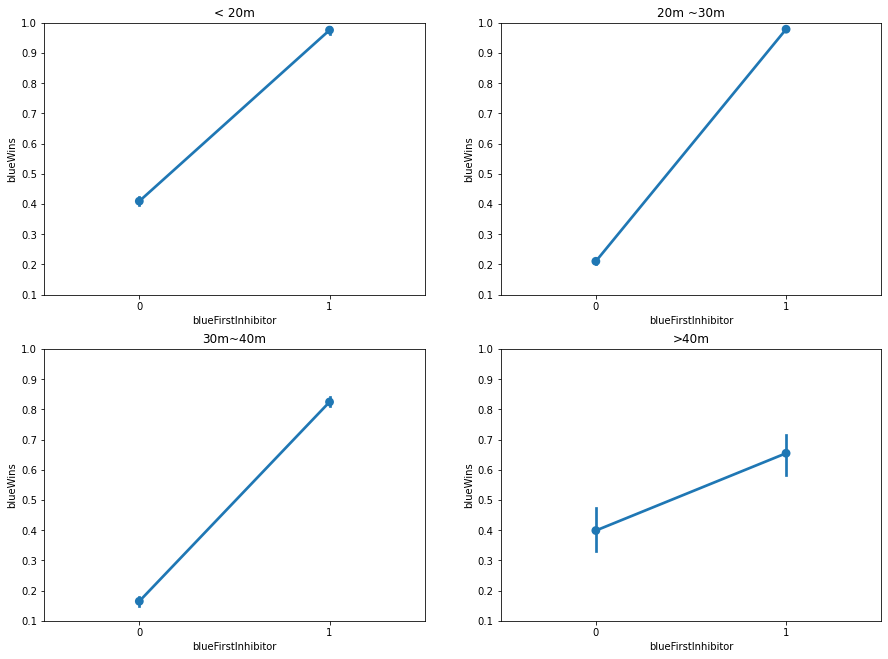

In [15]:
# 시간대별로 첫 억제기가 승리에 끼치는 영향
fig, axs = plt.subplots(2, 2, figsize=(15,11))

axs[0][0].set_title('< 20m')
axs[0][1].set_title('20m ~30m')
axs[1][0].set_title('30m~40m')
axs[1][1].set_title('>40m')

axs[0][0].set_ylim(0.1, 1)
axs[0][1].set_ylim(0.1, 1)
axs[1][0].set_ylim(0.1, 1)
axs[1][1].set_ylim(0.1, 1)

sns.pointplot(x='blueFirstInhibitor', y='blueWins', data=game_part1, ax = axs[0][0])
sns.pointplot(x='blueFirstInhibitor', y='blueWins', data=game_part2, ax = axs[0][1])
sns.pointplot(x='blueFirstInhibitor', y='blueWins', data=game_part3, ax = axs[1][0])
sns.pointplot(x='blueFirstInhibitor', y='blueWins', data=game_part4, ax = axs[1][1])

# 블루팀과 레드팀 분리

In [16]:
lol_chl.columns

Index(['gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt', 'game_time',
  

In [17]:
lol_chl_red = ['redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt']

In [18]:
# 블루팀만 따로 뺍니다.
lol_chl = lol_chl.drop(lol_chl_red, axis=1)
lol_chl

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,game_time,game_time_dummy
0,1323,0,1,0,0,0,0,0,0,0,...,37001,440,56,11.2,105,4,31035,5675,22.050000,20m ~ 30m
1,1317,1,0,0,0,1,0,2,0,4,...,41072,531,63,12.6,111,3,26397,45303,21.950000,20m ~ 30m
2,932,0,0,0,0,0,0,0,0,0,...,22929,306,42,8.4,64,0,6567,5651,15.533333,<20m
3,2098,0,0,0,1,1,0,1,1,2,...,63447,774,80,16.0,226,3,24718,31019,34.966667,30m ~ 40m
4,2344,1,1,1,1,1,1,2,2,11,...,74955,831,83,16.6,252,5,37161,95287,39.066667,30m ~ 40m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1280,1,0,1,1,1,1,3,1,7,...,51215,577,67,13.4,149,9,23564,57020,21.333333,20m ~ 30m
26899,1468,0,1,0,0,0,0,1,0,0,...,41437,438,60,12.0,106,8,20122,13309,24.466667,20m ~ 30m
26900,970,0,1,1,0,1,0,3,0,5,...,61221,346,65,13.0,28,5,32837,44640,16.166667,<20m
26901,1480,0,1,1,0,1,0,1,0,4,...,45013,568,63,12.6,132,4,18131,45242,24.666667,20m ~ 30m


# 전체 데이터 로짓 회귀

In [19]:
# 모델에 넣지 않을 변수를 정합니다.
lol_chl_not = ['gameDuraton', 'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
               'blueInhibitorKills', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold', 'blueTotalLevel', 'blueAvgLevel', 
               'blueKillingSpree', 'blueObjectDamageDealt', 'game_time', 'game_time_dummy']

In [20]:
# 모델에 넣지 않을 변수를 뺍니다.
lol_chl = lol_chl.drop(lol_chl_not, axis=1)
lol_chl

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueTotalMinionKills,blueJungleMinionKills,blueTotalHeal
0,0,1,0,0,0,0,38,13,15,31,440,105,31035
1,1,0,0,0,1,0,57,18,19,8,531,111,26397
2,0,0,0,0,0,0,28,7,5,20,306,64,6567
3,0,0,0,1,1,0,129,39,26,36,774,226,24718
4,1,1,1,1,1,1,114,35,27,40,831,252,37161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1,0,1,1,1,1,52,20,30,18,577,149,23564
26899,0,1,0,0,0,0,72,20,24,28,438,106,20122
26900,0,1,1,0,1,0,37,2,29,42,346,28,32837
26901,0,1,1,0,1,0,72,29,14,20,568,132,18131


In [21]:
# 로짓 회귀 실행
logit = sm.Logit(lol_chl[['blueWins']],lol_chl[lol_chl.columns.tolist()[1:]])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.114729
         Iterations 9


In [22]:
# 결과 요약
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit              Pseudo R-squared:   0.834    
Dependent Variable:   blueWins           AIC:                5446.7583
Date:                 2022-06-14 15:09   BIC:                5543.6031
No. Observations:     23633              Log-Likelihood:     -2711.4  
Df Model:             11                 LL-Null:            -16381.  
Df Residuals:         23621              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
blueFirstBlood        -0.4306   0.0744  -5.7901 0.0000 -0.5763 -0.2848
blueFirstTower         0.1907   0.0759   2.5144 0.0119  0.0421  0.3394
blueFirstBaron         0.8867   0.0865  10.2522 0.0000  0.7171  1.0562
blueFirstDragon        0.3337   0.0737   4.5254 0.0000  0.1892  0.4782
blueFirstInhibitor     2.1914   0.0900  24.3402 0.0000  2.0150  2.3679
blueWardPlaced        -0.0144   0.0026  -5.5831 0.0000 -0.0194 -0.0093
blueWardkills         -0.0160   0.0042  -3.7903 0.0002 -0.0242 -0.0077
blueKills              0.3313   0.0067  49.8086 0.0000  0.3183  0.3444
blueDeath             -0.3646   0.0064 -56.8248 0.0000 -0.3772 -0.3521
blueTotalMinionKills   0.0018   0.0004   4.3804 0.0000  0.0010  0.0027
blueJungleMinionKills -0.0004   0.0013  -0.3094 0.7570 -0.0030  0.0022
blueTotalHeal          0.0000   0.0000   2.9659 0.0030  0.0000  0.0000
======================================================================

"""

In [23]:
# result의 회귀계수를 해석가능하게 바꿉니다.
l_r_cofficient = []
l_r_logit = []
l_r_odds_ratio = []
l_r_percent = []


for ind, val in zip(result.params.index, result.params.values) :
    l_r_cofficient.append(ind)
    l_r_logit.append(val)
    l_r_odds_ratio.append(np.exp(val))
    l_r_percent.append((np.exp(val) - 1)*100)
    
r_summary_df = pd.DataFrame(zip(l_r_cofficient, l_r_logit, l_r_odds_ratio, l_r_percent))
r_summary_df.columns = ['cofficient', 'logit', 'odds_ratio', 'percent']
r_summary_df = r_summary_df.set_index('cofficient')
r_summary_df

,logit,odds_ratio,percent
cofficient,,,
blueFirstBlood,-0.430552,0.650150,-34.985011
blueFirstTower,0.190741,1.210146,21.014614
blueFirstBaron,0.886656,2.426999,142.699913
blueFirstDragon,0.333711,1.396140,39.614006
blueFirstInhibitor,2.191438,8.948075,794.807493
blueWardPlaced,-0.014384,0.985719,-1.428056
blueWardkills,-0.015950,0.984176,-1.582366
blueKills,0.331349,1.392846,39.284615
blueDeath,-0.364629,0.694454,-30.554569


# 시간대별 데이터 로짓 회귀

In [24]:
# 시간대별로 분류한 데이터에서 레드팀을 빼줍니다.
game_part1 = game_part1.drop(lol_chl_red, axis=1)
game_part2 = game_part2.drop(lol_chl_red, axis=1)
game_part3 = game_part3.drop(lol_chl_red, axis=1)
game_part4= game_part4.drop(lol_chl_red, axis=1)

In [25]:
# 모델에 넣지 않을 변수를 정합니다.
lol_chl_not = ['gameDuraton', 'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
               'blueInhibitorKills', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold', 'blueTotalLevel', 'blueAvgLevel', 
               'blueKillingSpree', 'blueObjectDamageDealt', 'game_time']

In [26]:
# 모델에 넣지 않을 변수를 뺍니다.
game_part1 = game_part1.drop(lol_chl_not, axis=1)
game_part2 = game_part2.drop(lol_chl_not, axis=1)
game_part3 = game_part3.drop(lol_chl_not, axis=1)
game_part4 = game_part4.drop(lol_chl_not, axis=1)

## 20분 미만 데이터 로짓 회귀

In [27]:
# 로짓 회귀 실행
logit1 = sm.Logit(game_part1[['blueWins']],game_part1[game_part1.columns.tolist()[1:]])
result1 = logit1.fit()

# 결과 요약
result1.summary2()

Optimization terminated successfully.
         Current function value: 0.046827
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit              Pseudo R-squared:   0.932   
Dependent Variable:    blueWins           AIC:                486.4585
Date:                  2022-06-14 15:09   BIC:                564.5151
No. Observations:      4938               Log-Likelihood:     -231.23 
Df Model:              11                 LL-Null:            -3422.8 
Df Residuals:          4926               LLR p-value:        0.0000  
Converged:             1.0000             Scale:              1.0000  
No. Iterations:        10.0000                                        
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
blueFirstBlood        -0.2110   0.2777  -0.7599 0.4473 -0.7554  0.3333
blueFirstTower         1.9336   0.2851   6.7817 0.0000  1.3748  2.4924
blueFirstBaron         0.3655   0.7965   0.4589 0.6463 -1.1956  1.9267
blueFirstDragon        0.0292   0.2914   0.1003 0.9201 -0.5420  0.6004
blueFirstInhibitor     3.9635   0.7599   5.2156 0.0000  2.4741  5.4530
blueWardPlaced        -0.0532   0.0196  -2.7156 0.0066 -0.0917 -0.0148
blueWardkills          0.0425   0.0355   1.1963 0.2316 -0.0271  0.1121
blueKills              0.3710   0.0214  17.3655 0.0000  0.3291  0.4129
blueDeath             -0.4024   0.0200 -20.1122 0.0000 -0.4416 -0.3632
blueTotalMinionKills  -0.0044   0.0023  -1.9087 0.0563 -0.0089  0.0001
blueJungleMinionKills  0.0250   0.0065   3.8227 0.0001  0.0122  0.0378
blueTotalHeal          0.0000   0.0000   1.3297 0.1836 -0.0000  0.0001
======================================================================

"""

In [28]:
# result1의 회귀계수를 해석가능하게 바꿉니다.
l_r_cofficient1 = []
l_r_logit1 = []
l_r_odds_ratio1 = []
l_r_percent1 = []


for ind, val in zip(result1.params.index, result1.params.values) :
    l_r_cofficient1.append(ind)
    l_r_logit1.append(val)
    l_r_odds_ratio1.append(np.exp(val))
    l_r_percent1.append((np.exp(val) - 1)*100)
    
r_summary1_df = pd.DataFrame(zip(l_r_cofficient1, l_r_logit1, l_r_odds_ratio1, l_r_percent1))
r_summary1_df.columns = ['cofficient', 'logit', 'odds_ratio', 'percent']
r_summary1_df = r_summary1_df.set_index('cofficient')
r_summary1_df

,logit,odds_ratio,percent
cofficient,,,
blueFirstBlood,-0.211045,0.809738,-19.026229
blueFirstTower,1.933572,6.914163,591.416345
blueFirstBaron,0.365550,1.441306,44.130637
blueFirstDragon,0.029221,1.029652,2.965216
blueFirstInhibitor,3.963514,52.642011,5164.201105
blueWardPlaced,-0.053247,0.948146,-5.185411
blueWardkills,0.042504,1.043420,4.342042
blueKills,0.370994,1.449175,44.917471
blueDeath,-0.402411,0.668706,-33.129392


## 20~30분 데이터 로짓 회귀

In [29]:
# 로짓 회귀 실행
logit2 = sm.Logit(game_part2[['blueWins']],game_part2[game_part2.columns.tolist()[1:]])
result2 = logit2.fit()

# 결과 요약
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.054882
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit              Pseudo R-squared:   0.921    
Dependent Variable:   blueWins           AIC:                1466.5090
Date:                 2022-06-14 15:09   BIC:                1556.3118
No. Observations:     13142              Log-Likelihood:     -721.25  
Df Model:             11                 LL-Null:            -9109.2  
Df Residuals:         13130              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
blueFirstBlood        -0.7566   0.1509  -5.0146 0.0000 -1.0524 -0.4609
blueFirstTower         0.3143   0.1518   2.0700 0.0384  0.0167  0.6120
blueFirstBaron         2.0313   0.1849  10.9839 0.0000  1.6688  2.3937
blueFirstDragon        0.3448   0.1467   2.3500 0.0188  0.0572  0.6324
blueFirstInhibitor     3.3342   0.2101  15.8703 0.0000  2.9224  3.7460
blueWardPlaced        -0.0252   0.0061  -4.1092 0.0000 -0.0373 -0.0132
blueWardkills         -0.0158   0.0103  -1.5262 0.1270 -0.0360  0.0045
blueKills              0.4019   0.0142  28.2813 0.0000  0.3740  0.4297
blueDeath             -0.4249   0.0133 -31.9684 0.0000 -0.4510 -0.3989
blueTotalMinionKills   0.0008   0.0010   0.7852 0.4323 -0.0012  0.0028
blueJungleMinionKills  0.0048   0.0032   1.5124 0.1304 -0.0014  0.0110
blueTotalHeal          0.0000   0.0000   0.7474 0.4548 -0.0000  0.0000
======================================================================

"""

In [30]:
# result2의 회귀계수를 해석가능하게 바꿉니다.
l_r_cofficient2 = []
l_r_logit2 = []
l_r_odds_ratio2 = []
l_r_percent2 = []


for ind, val in zip(result2.params.index, result2.params.values) :
    l_r_cofficient2.append(ind)
    l_r_logit2.append(val)
    l_r_odds_ratio2.append(np.exp(val))
    l_r_percent2.append((np.exp(val) - 1)*100)
    
r_summary2_df = pd.DataFrame(zip(l_r_cofficient2, l_r_logit2, l_r_odds_ratio2, l_r_percent2))
r_summary2_df.columns = ['cofficient', 'logit', 'odds_ratio', 'percent']
r_summary2_df = r_summary2_df.set_index('cofficient')
r_summary2_df

,logit,odds_ratio,percent
cofficient,,,
blueFirstBlood,-0.756624,0.469248,-53.075225
blueFirstTower,0.314333,1.369345,36.934535
blueFirstBaron,2.031261,7.623694,662.369388
blueFirstDragon,0.344799,1.411706,41.170638
blueFirstInhibitor,3.334188,28.055587,2705.558663
blueWardPlaced,-0.025243,0.975073,-2.492667
blueWardkills,-0.015753,0.984370,-1.563000
blueKills,0.401870,1.494617,49.461727
blueDeath,-0.424907,0.653830,-34.616951


## 30~40분 데이터 로짓 회귀

In [31]:
# 로짓 회귀 실행
logit3 = sm.Logit(game_part3[['blueWins']],game_part3[game_part3.columns.tolist()[1:]])
result3 = logit3.fit()

# 결과 요약
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.254410
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit              Pseudo R-squared:   0.633    
Dependent Variable:   blueWins           AIC:                2658.6749
Date:                 2022-06-14 15:09   BIC:                2737.3010
No. Observations:     5178               Log-Likelihood:     -1317.3  
Df Model:             11                 LL-Null:            -3587.6  
Df Residuals:         5166               LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       8.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
blueFirstBlood        -0.2612   0.1017  -2.5687 0.0102 -0.4605 -0.0619
blueFirstTower        -0.3568   0.1059  -3.3689 0.0008 -0.5644 -0.1492
blueFirstBaron         0.5151   0.1036   4.9705 0.0000  0.3120  0.7182
blueFirstDragon        0.1939   0.1018   1.9055 0.0567 -0.0055  0.3933
blueFirstInhibitor     1.9441   0.1091  17.8122 0.0000  1.7302  2.1581
blueWardPlaced        -0.0116   0.0031  -3.7038 0.0002 -0.0177 -0.0054
blueWardkills         -0.0090   0.0051  -1.7740 0.0761 -0.0189  0.0009
blueKills              0.2425   0.0093  25.9747 0.0000  0.2242  0.2608
blueDeath             -0.2821   0.0093 -30.1827 0.0000 -0.3005 -0.2638
blueTotalMinionKills   0.0021   0.0006   3.6056 0.0003  0.0010  0.0032
blueJungleMinionKills -0.0018   0.0016  -1.1323 0.2575 -0.0050  0.0014
blueTotalHeal          0.0000   0.0000   3.5594 0.0004  0.0000  0.0000
======================================================================

"""

In [32]:
# result3의 회귀계수를 해석가능하게 바꿉니다.
l_r_cofficient3 = []
l_r_logit3 = []
l_r_odds_ratio3 = []
l_r_percent3 = []


for ind, val in zip(result3.params.index, result3.params.values) :
    l_r_cofficient3.append(ind)
    l_r_logit3.append(val)
    l_r_odds_ratio3.append(np.exp(val))
    l_r_percent3.append((np.exp(val) - 1)*100)
    
r_summary3_df = pd.DataFrame(zip(l_r_cofficient3, l_r_logit3, l_r_odds_ratio3, l_r_percent3))
r_summary3_df.columns = ['cofficient', 'logit', 'odds_ratio', 'percent']
r_summary3_df = r_summary3_df.set_index('cofficient')
r_summary3_df

,logit,odds_ratio,percent
cofficient,,,
blueFirstBlood,-0.261210,0.770119,-22.988082
blueFirstTower,-0.356806,0.699909,-30.009148
blueFirstBaron,0.515093,1.673794,67.379417
blueFirstDragon,0.193885,1.213957,21.395690
blueFirstInhibitor,1.944142,6.987635,598.763539
blueWardPlaced,-0.011574,0.988493,-1.150681
blueWardkills,-0.009003,0.991038,-0.896224
blueKills,0.242466,1.274388,27.438820
blueDeath,-0.282148,0.754162,-24.583829


## 40분 이상 데이터 로짓 회귀

In [33]:
# 로짓 회귀 실행
logit4 = sm.Logit(game_part4[['blueWins']],game_part4[game_part4.columns.tolist()[1:]])
result4 = logit4.fit()

# 결과 요약
result4.summary2()

Optimization terminated successfully.
         Current function value: 0.486186
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.296     
Dependent Variable:   blueWins          AIC:               388.6395  
Date:                 2022-06-14 15:09  BIC:               435.7626  
No. Observations:     375               Log-Likelihood:    -182.32   
Df Model:             11                LL-Null:           -259.10   
Df Residuals:         363               LLR p-value:       2.7985e-27
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
blueFirstBlood        -0.6754   0.2751 -2.4557 0.0141 -1.2146 -0.1363
blueFirstTower        -0.3787   0.2737 -1.3834 0.1665 -0.9152  0.1578
blueFirstBaron        -0.6074   0.2749 -2.2096 0.0271 -1.1462 -0.0686
blueFirstDragon        0.3153   0.2666  1.1827 0.2369 -0.2072  0.8377
blueFirstInhibitor     0.9400   0.2813  3.3416 0.0008  0.3886  1.4913
blueWardPlaced         0.0006   0.0059  0.1085 0.9136 -0.0109  0.0122
blueWardkills         -0.0034   0.0104 -0.3281 0.7428 -0.0238  0.0169
blueKills              0.1818   0.0224  8.1197 0.0000  0.1380  0.2257
blueDeath             -0.1779   0.0218 -8.1579 0.0000 -0.2207 -0.1352
blueTotalMinionKills  -0.0017   0.0012 -1.4677 0.1422 -0.0040  0.0006
blueJungleMinionKills  0.0078   0.0034  2.2948 0.0217  0.0011  0.0145
blueTotalHeal         -0.0000   0.0000 -0.5661 0.5713 -0.0000  0.0000
=====================================================================

"""

In [34]:
# result4의 회귀계수를 해석가능하게 바꿉니다.
l_r_cofficient4 = []
l_r_logit4 = []
l_r_odds_ratio4 = []
l_r_percent4 = []


for ind, val in zip(result4.params.index, result4.params.values) :
    l_r_cofficient4.append(ind)
    l_r_logit4.append(val)
    l_r_odds_ratio4.append(np.exp(val))
    l_r_percent4.append((np.exp(val) - 1)*100)
    
r_summary4_df = pd.DataFrame(zip(l_r_cofficient4, l_r_logit4, l_r_odds_ratio4, l_r_percent4))
r_summary4_df.columns = ['cofficient', 'logit', 'odds_ratio', 'percent']
r_summary4_df = r_summary4_df.set_index('cofficient')
r_summary4_df

,logit,odds_ratio,percent
cofficient,,,
blueFirstBlood,-0.675450,0.508927,-49.107253
blueFirstTower,-0.378676,0.684767,-31.523253
blueFirstBaron,-0.607411,0.544759,-45.524082
blueFirstDragon,0.315261,1.370617,37.061735
blueFirstInhibitor,0.939958,2.559874,155.987385
blueWardPlaced,0.000641,1.000641,0.064110
blueWardkills,-0.003407,0.996599,-0.340084
blueKills,0.181850,1.199434,19.943404
blueDeath,-0.177941,0.836991,-16.300852
